In [1]:
from tqdm import tqdm
import random
import pandas as pd
import numpy as np
import seaborn as sns
import unidecode
import re

from generate_dataset import *

# Load raw data

In [2]:
data_file = 'data/data_27topics_processed.txt'
language = 'vi'
with open(data_file, 'r') as file:
    reader = file.readlines()

In [3]:
len(reader)

359993

In [20]:
vn_dict = set()
vn_dict.update(['hôm'])
list(vn_dict)

['hôm']

In [25]:
list_len = []
sentences = []
for line in reader:
    if len(line.split()) in range(10, 45):
        sentences.append(line)
        list_len.append(line.split().__len__())
    
    tokens = re.findall(r'\w+|[^\w\s]', line) # Tách dấu câu ra

    for tk in tokens:
        if tk not in punctuation and not is_number(tk):
            vn_dict.update([tk])



In [17]:
vn_dict

['000E',
 '000M',
 '000USD',
 '000W',
 '000ha',
 '000km',
 '000m',
 '000m2',
 '000mA',
 '000mg',
 '000w',
 '000đ',
 '007Die',
 '008k',
 '00C',
 '00SGD',
 '00a',
 '00avà',
 '00c',
 '00g00',
 '016h45',
 '01ALvà',
 '01d1b',
 '01g00',
 '01h10',
 '01h45',
 '02CKĐ',
 '02CT1',
 '02QK',
 '02h15',
 '03CS06',
 '03DTP3',
 '045xử',
 '06h10',
 '075m2',
 '07XD1N',
 '0830h',
 '083gr',
 '08V',
 '08cm',
 '08Địa',
 '090342xxxx',
 '090346xxxx',
 '0903xxxxxx',
 '090766xxxx',
 '090xxx8888',
 '091867xxxx',
 '0AC',
 '0An',
 '0Arsenal',
 '0Bán',
 '0Bình',
 '0Bưu',
 '0Bồ',
 '0C',
 '0Các',
 '0Cần',
 '0Eh',
 '0GHz',
 '0GM',
 '0Ghi',
 '0Ghz',
 '0GĐT',
 '0H',
 '0HAGL',
 '0HP',
 '0HPHN',
 '0Hoà',
 '0Huda',
 '0Huỳnh',
 '0Hà',
 '0Hòa',
 '0KS',
 '0KSKH',
 '0Khanh',
 '0L',
 '0Lazio',
 '0Levski',
 '0Lê',
 '0Monaco',
 '0NH',
 '0NHĐA',
 '0Nguyễn',
 '0Ngô',
 '0Nigeria',
 '0QK',
 '0QK7',
 '0Quảng',
 '0Real',
 '0Rennes',
 '0Sau',
 '0Sri',
 '0Sân',
 '0SĐNĐ',
 '0TMN',
 '0TT',
 '0Thanh',
 '0Thuỵ',
 '0Thất',
 '0Thể',
 '0Thừa',
 

In [6]:
df = pd.DataFrame(list_len, columns=['len'])
df.head()

,len
0,34
1,20
2,39
3,21
4,24


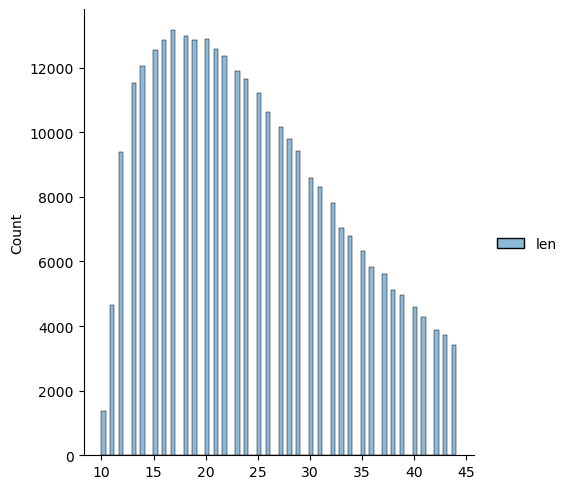

In [7]:
sns.displot(df)

# Tạo dataset ( Tự tạo lỗi )

In [15]:
data = {
    'sentence': [],
    'label': []
}

for line in tqdm(sentences):
    line = line.rstrip('\n').rstrip()
    tokens = re.findall(r'\w+|[^\w\s]', line) # Tách dấu câu ra
    line = " ".join(tokens)

    if '. ' in line: # Không lấy các line có từ 2 câu trở lên hoặc có dấu ...
        continue
    '''
    mỗi từ có xác suất: 
        remove_random_space 0.025
        remove_random_accent 0.025
        replace_accent_chars 0.025
        lower_case_words = 0.025
    mỗi chữ cái có xác suất:
        swap_characters_case 0.01
        delete_characters 0.01
        insert_characters 0.01
        replace_characters 0.01
    '''

    idx = list()

    line, err_idx_1= remove_random_space(line, 0.025)
    idx.extend(err_idx_1)

    w_functions = [remove_random_accent, replace_accent_chars, lower_case_words]
    c_functions = [swap_characters_case, delete_characters, insert_characters, replace_characters]
    for func in w_functions:
        line, _ = func(line, 0.025)  # line mới và idx lỗi
        idx.extend(_)
    
    for func in c_functions:
        line, _ = func(line, 0.01) 
        idx.extend(_)
    
    mask = []
    for i in range(len(line.split())):
        if i in err_idx_1:
            mask.append(2) # Đánh dấu lỗi bị xóa dấu cách
        else:
            mask.append(int(i in idx))
    
    # Lưu lại mẫu (sentence, label) vừa tạo ---------------------------
    data['sentence'].append(line)

    label = [str(i) for i in mask]
    label = ''.join(label)
    data['label'].append(label)

    if len(data['sentence']) == 50000:
        break

 19%|█▉        | 58497/302036 [00:44<03:05, 1313.48it/s]


In [16]:
df_data = pd.DataFrame(data)
df_data

,sentence,label
0,Nếu làm đưsợc như vậy thì chắc chắn sẽ không ò...,001000000010001001000000100000111100
1,TỶ lệ nhà hàng TQrunG a so vớ nhà hÀng Việt Nm...,10001101010100000000000100000001000000100000
2,"Tuy nhiên , cần cú ý là nếu bênnào tữớng chết ...",000010002100000200100
3,"Trong xây dựng nhà ở , khi hoàn tất công rình ...",0000010000100000000101000000
4,"Trong đó , nhiều nhất và đa dạng nhàt là hồng ...",000000001000000
...,...,...
49995,Có 625 công ty Rromg toàn khu vực hội đủ vtiêu...,00001000001000010
49996,"Tiến thoáiW lưỡng nan Ông huỳnh Văn Tấn , 61 t...",01000100000000000000010000000010
49997,Và đó chắc chắn sẽ lậ bước đệm để họ tự tin bư...,00000100000000100
49998,Tôi có thói quen tự bươn chải và khJngquan niệ...,00000000200000000000


In [17]:
df_data.to_csv('data_v2/data250k.csv', index=False)